In [ ]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from tifffile import *
from glob import glob
!pip install rasterio
!pip install earthpy
import rasterio

import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib.patches import Patch
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

from matplotlib.colors import Normalize
from scipy.interpolate import interpn
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

# Import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from osgeo import gdal
import os
import glob
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)


import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import xgboost as xgb


np.seterr(divide='ignore', invalid='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 69.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.3 MB/s eta 0:00:00


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## XGBoost unlimited depth

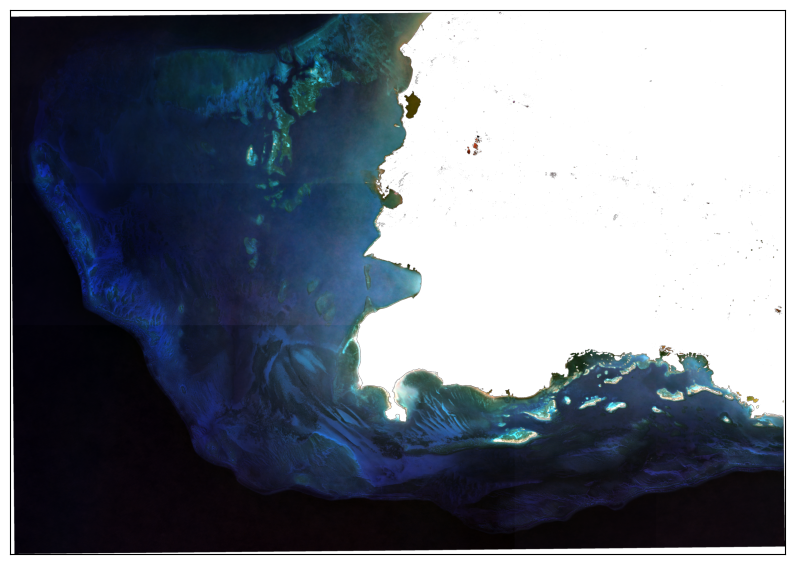

In [ ]:
## Get reference data and set all values to 1.
# Sentinel-2 image:
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance.tif') as src:
    image = src.read()

image = image.astype(np.float32) # from integer to float

image[image==0] = np.nan
image[image<-1000] = np.nan
image.shape

ep.plot_rgb(image,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
## Stack image with reference
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance.tif') as src:
    reference = src.read()
reference = reference[-1,:,:]
reference.shape

(3783, 5389)

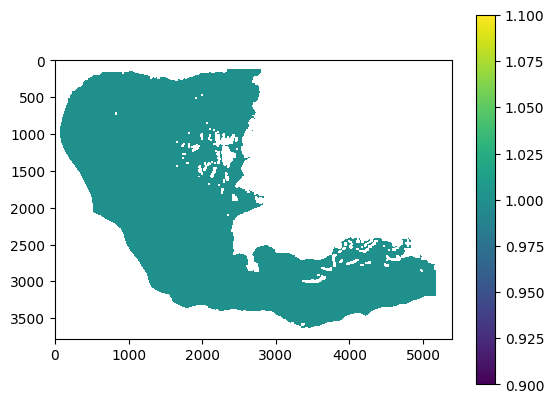

In [ ]:
## Stack image with reference
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance.tif') as src:
    ref = src.read()

ref[-1,:,:][ref[-1,:,:] > 0] = 1
ref[-1,:,:][ref[-1,:,:] < 0] = 1
ref[-1,:,:][ref[-1,:,:] == 0] = 1
ref = ref[-1,:,:]

pc = plt.imshow(ref)
plt.colorbar(pc)

In [ ]:
reference_20 = np.where(reference < -20, np.nan, reference)



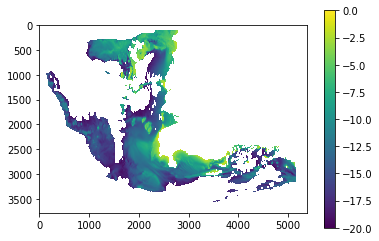

In [ ]:
pc = plt.imshow(reference_20)
plt.colorbar(pc)

In [ ]:
def reshape_y_pred(image, y_pred):
    image_reference = image[12,:,:]
    nan_mask = np.isnan(image_reference)
    image_reference_no_nan = image_reference[~nan_mask]
    image_reference_empty = np.empty_like(image_reference)
    image_reference_empty.fill(np.nan)
    image_reference_empty[~nan_mask] = y_pred
    y_pred = image_reference_empty
    y_pred_reshape = y_pred.reshape(image_reference.shape)
    return y_pred_reshape

In [ ]:
def remove_nan(image, ref, reference):
    image = image.astype(np.float32) # from integer to float
    image = np.where(image == 0, np.nan, image)
    image = np.where(image < 0, np.nan, image)
    image = np.concatenate((image, reference[np.newaxis,:,:]), axis=0)


    #index = np.isnan(image[4,:,:])
    # ref[-1,:,:][ref[-1,:,:] > 0] = 1
    # ref[-1,:,:][ref[-1,:,:] < 0] = 1
    # ref[-1,:,:][ref[-1,:,:] == 0] = 1
    # ref = ref[-1,:,:]

    image_copy = image * ref
    image_copy[3,:,:][image_copy[3,:,:] >= 0] = 1
    image = image * image_copy[3,:,:]
    #image = np.moveaxis(image, 0, -1)
    return image


In [ ]:
image = remove_nan(image, ref, reference)

In [ ]:
image = np.delete(image, 12, axis=0)
image.shape

(13, 3783, 5389)

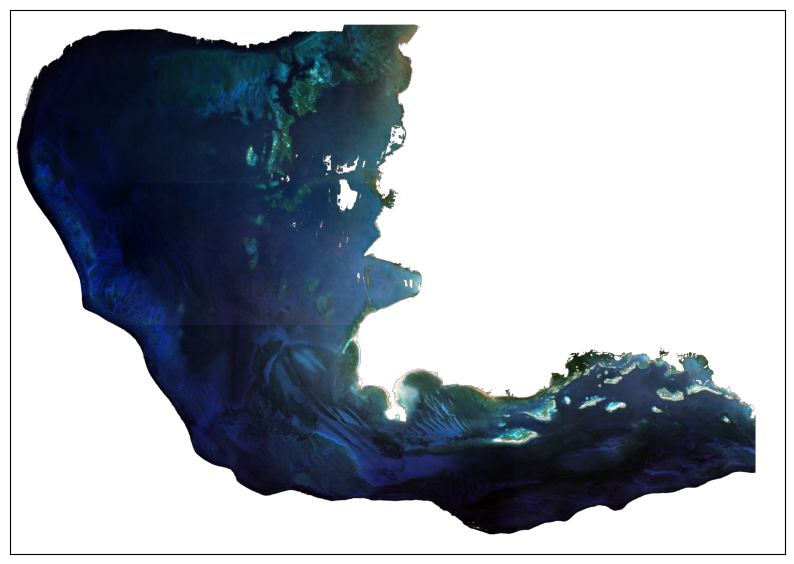

In [ ]:
ep.plot_rgb(image,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
image_red = image[0,:,:]
image_red = image_red[~np.isnan(image_red)]
image_red.shape #(8760015,)
# conclusion: equal shapes

In [ ]:
# Total pixels:
image_tot = image[:,:,:]
image_tot_shape = np.moveaxis(image_tot, 0, -1)
image_tot_no_nan = image_tot_shape[~np.isnan(image_tot_shape).any(axis=2)]
print(image_tot_no_nan.shape)
8760015/10

(965, 5389, 13)
(13, 965, 5389)
(2212124, 13)


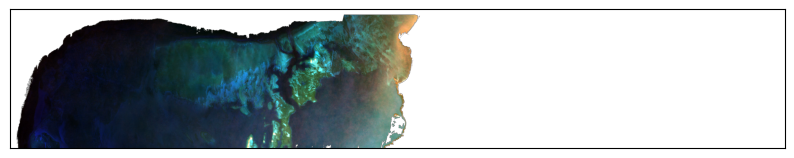

In [ ]:
image_1 = image[:,70:1035,:]
image_1_shape = np.moveaxis(image_1, 0, -1)
print(image_1_shape.shape)
image_1_no_nan = image_1_shape[~np.isnan(image_1_shape).any(axis=2)]
print(image_1.shape)
print(image_1_no_nan.shape)
ep.plot_rgb(image_1,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 965, 5389)
(2227496, 13)


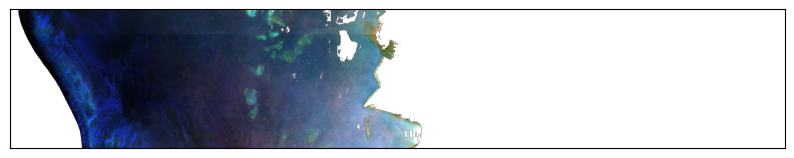

In [ ]:
image_2 = image[:,1035:2000,:]
image_2_shape = np.moveaxis(image_2, 0, -1)
image_2_no_nan = image_2_shape[~np.isnan(image_2_shape).any(axis=2)]
print(image_2.shape)
print(image_2_no_nan.shape)
ep.plot_rgb(image_2,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2800)
(2161279, 13)


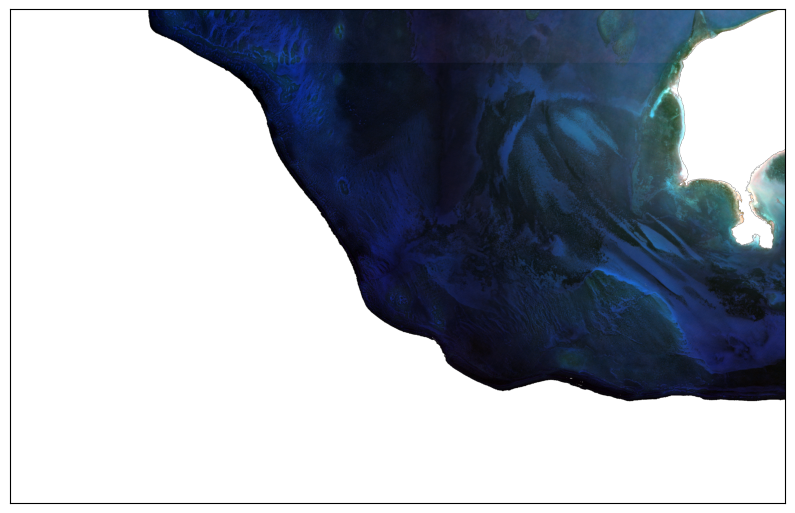

In [ ]:
image_3 = image[:,2000:,:2800]
image_3_shape = np.moveaxis(image_3, 0, -1)
image_3_no_nan = image_3_shape[~np.isnan(image_3_shape).any(axis=2)]
print(image_3.shape)
print(image_3_no_nan.shape)
ep.plot_rgb(image_3,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2589)
(2159116, 13)


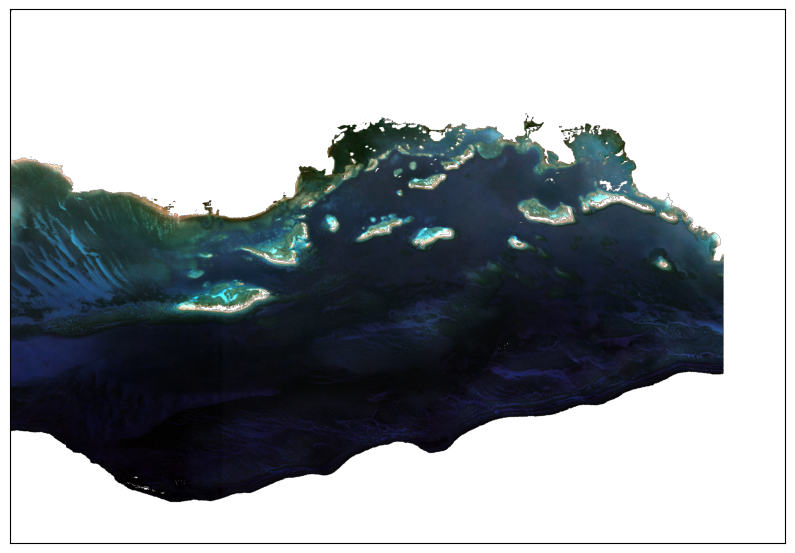

In [ ]:
image_4 = image[:,2000:,2800:]
image_4_shape = np.moveaxis(image_4, 0, -1)
image_4_no_nan = image_4_shape[~np.isnan(image_4_shape).any(axis=2)]
print(image_4.shape)
print(image_4_no_nan.shape)
ep.plot_rgb(image_4,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2800)
(2159116, 13)


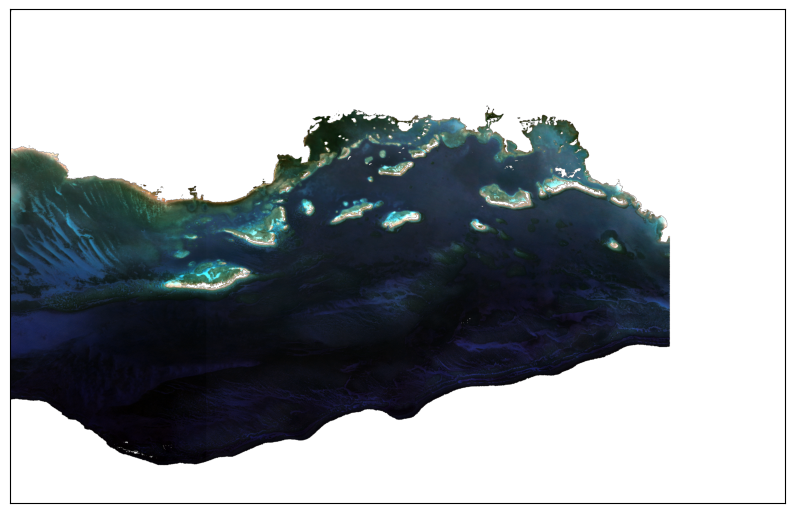

<Axes: >

In [ ]:
# Add columns of NaN to the right-hand side of image_4
image_4 = np.pad(image_4, ((0,0), (0, 0), (0, 2800-2589)), mode='constant', constant_values=np.nan)
print(image_4.shape)
print(image_4_no_nan.shape)
ep.plot_rgb(image_4,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))

In [ ]:
image_3_4 = np.concatenate((image_3, image_4), axis = 2)
image_1_2 = np.concatenate((image_1, image_2), axis = 1)
print(image_1_2.shape)
print(image_3_4.shape)

In [ ]:
nan_array = np.full((13, image_1_2[0,:,0].shape[0]-image_3_4[0,:,0].shape[0], 5600), np.nan)
image_3_4 = np.concatenate((image_3_4, nan_array), axis = 1)
image_3_4 = image_3_4[:,:,0:5389]
image_3_4.shape

In [ ]:
image_1_2_3_4 = np.concatenate((image_1_2, image_3_4),axis=1)
image_1_2_3_4.shape

In [ ]:
ep.plot_rgb(image_1_2_3_4,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))

In [ ]:
pc = plt.imshow(image_1_2_3_4[12,:,:])
plt.colorbar(pc)

In [ ]:
# splits:
image_1_2_3_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(image_1_2_3_no_nan.shape)
image_1_2_4_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(image_1_2_4_no_nan.shape)
image_1_3_4_no_nan = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_1_3_4_no_nan.shape)
image_2_3_4_no_nan = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_2_3_4_no_nan.shape)

(6600899, 12)
(6598736, 12)
(6532519, 12)
(6547891, 12)


In [ ]:
# train splits X:
X_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(X_train_1_2_3.shape)
X_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_2_4.shape)
X_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_3_4.shape)
X_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_2_3_4.shape)

# train splits y:
y_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,-1]
print(y_train_1_2_3.shape)
y_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_2_4.shape)
y_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_3_4.shape)
y_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_2_3_4.shape)

(6600899, 12)
(6598736, 12)
(6532519, 12)
(6547891, 12)
(6600899,)
(6598736,)
(6532519,)
(6547891,)


In [ ]:
# Test splits X:
X_test_1 = image_1_no_nan[:,0:12]
print(X_test_1.shape)
X_test_2 = image_2_no_nan[:,0:12]
print(X_test_2.shape)
X_test_3 = image_3_no_nan[:,0:12]
print(X_test_3.shape)
X_test_4 = image_4_no_nan[:,0:12]
print(X_test_4.shape)

# Test splits y:
y_test_1 = image_1_no_nan[:,-1]
print(y_test_1.shape)
y_test_2 = image_2_no_nan[:,-1]
print(y_test_2.shape)
y_test_3 = image_3_no_nan[:,-1]
print(y_test_3.shape)
y_test_4 = image_4_no_nan[:,-1]
print(y_test_4.shape)

(2212124, 12)
(2227496, 12)
(2161279, 12)
(2159116, 12)
(2212124,)
(2227496,)
(2161279,)
(2159116,)


In [ ]:
model = xgb.XGBRegressor(
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 reg_lambda=0.1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 learning_rate =0.01,
 tree_method='gpu_hist',
 gpu_id=0,
 seed=27)

In [ ]:
# Train: 1,2,3. Test: 4
model.fit(X_train_1_2_3, y_train_1_2_3)
y_pred_4 = model.predict(X_test_4)

# Train: 1,2,4. Test: 3
model.fit(X_train_1_2_4, y_train_1_2_4)
y_pred_3 = model.predict(X_test_3)

# Train: 1,3,4. Test: 2
model.fit(X_train_1_3_4, y_train_1_3_4)
y_pred_2 = model.predict(X_test_2)

# Train: 2,3,4. Test: 1
model.fit(X_train_2_3_4, y_train_2_3_4)
y_pred_1 = model.predict(X_test_1)

In [ ]:
print(y_pred_1.shape, 'y_pred_1')
print(y_test_1.shape, 'y_test_1')
print(y_pred_2.shape, 'y_pred_2')
print(y_test_2.shape, 'y_test_2')
print(y_pred_3.shape, 'y_pred_3')
print(y_test_3.shape, 'y_test_3')
print(y_pred_4.shape, 'y_pred_4')
print(y_test_4.shape, 'y_test_4')

In [ ]:
def calculate_metrics_area(y_pred, y_test):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    y = y_pred[~np.isnan(y_pred)]
    df_y_pred = pd.DataFrame(y)
    y_test = y_test.flatten()
    y_test = y_test[~np.isnan(y_test)]
    df_y_test = pd.DataFrame(y_test)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_y_test, df_y_pred], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    return rmse, r2, mae

In [ ]:
rmse,r2,mae = calculate_metrics_area(y_pred_1, y_test_1)
metrics_1 = list((rmse, r2, mae))
print(metrics_1,'area 1')

rmse,r2,mae = calculate_metrics_area(y_pred_2, y_test_2)
metrics_2 = list((rmse, r2, mae))
print(metrics_2, 'area 2')

rmse,r2,mae = calculate_metrics_area(y_pred_3, y_test_3)
metrics_3 = list((rmse, r2, mae))
print(metrics_3, 'area 3')

rmse,r2,mae = calculate_metrics_area(y_pred_4, y_test_4)
metrics_4 = list((rmse, r2, mae))
print(metrics_4, 'area 4')

In [ ]:
df_pred = pd.DataFrame(y_pred_4)
df_test = pd.DataFrame(y_test_4)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

In [ ]:
y_pred_1_reshape = reshape_y_pred(image_1,y_pred_1)
print(y_pred_1_reshape.shape, 'y_pred_1')
y_pred_2_reshape = reshape_y_pred(image_2,y_pred_2)
print(y_pred_2_reshape.shape, 'y_pred_2')
y_pred_3_reshape = reshape_y_pred(image_3,y_pred_3)
print(y_pred_3_reshape.shape, 'y_pred_3')
y_pred_4_reshape = reshape_y_pred(image_4,y_pred_4)
print(y_pred_4_reshape.shape, 'y_pred_4')


In [ ]:
y_pred_3_4 = np.concatenate((y_pred_3_reshape,y_pred_4_reshape),axis=1)
pc = plt.imshow(y_pred_3_4)
plt.colorbar(pc)
print(y_pred_3_4.shape)

In [ ]:
y_pred_1_2 = np.concatenate((y_pred_1_reshape,y_pred_2_reshape),axis=0)
pc = plt.imshow(y_pred_1_2)
plt.colorbar(pc)
print(y_pred_1_2.shape)

In [ ]:
nan_array = np.full((y_pred_1_2[:,0].shape[0]-y_pred_3_4[:,0].shape[0], 5600), np.nan)
y_pred_3_4 = np.concatenate((y_pred_3_4, nan_array), axis = 0)
y_pred_3_4 = y_pred_3_4[:,0:5389]
y_pred_3_4.shape

In [ ]:
y_pred_1_2_3_4 = np.concatenate((y_pred_1_2, y_pred_3_4), axis = 0)
pc = plt.imshow(y_pred_1_2_3_4)
plt.colorbar(pc)

In [ ]:
def calculate_metrics(depth, reference):
    # Mask NaN values
    mask = ~np.isnan(depth) & ~np.isnan(reference)
    depth = depth[mask]
    reference = reference[mask]

    # Calculate RMSE, MAE, and R2
    rmse = mean_squared_error(reference, depth, squared=False)
    mae = np.mean(abs(reference - depth))
    r2 = r2_score(reference, depth)

    return rmse, mae, r2

In [ ]:
df3, rmse, r2, mae, error = calculate_metrics(y_pred_1_2_3_4, image)
metrics_total = list((rmse, r2, mae))
metrics_total

In [ ]:
df3, rmse, r2, mae, error = calculate_metrics(y_pred_1_2_3_4, image)
metrics_total = list((rmse, r2, mae))
metrics_total

[3.768960275867257, 0.7458763248647675, 2.7721490742252812]

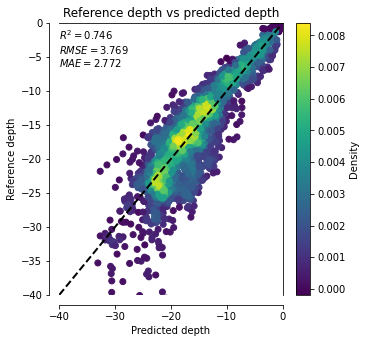

In [ ]:
df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-40,0])
    ax.set_ylim([-40,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-40, -2.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-40, -4.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-40, -6.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

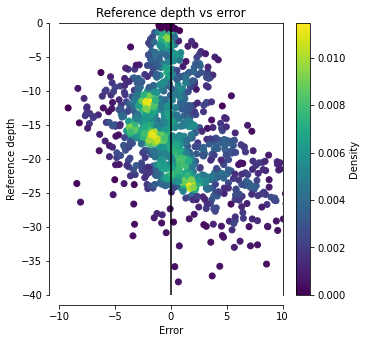

In [ ]:
df3_sample = df3.sample(n = 1000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-10,10])
    ax.set_ylim([-40,0])
    ax.set_xlabel("Error")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.8))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -4.1))

    #ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs error")
    plt.axvline(x = 0, color = 'black', label = 'axvline - full height')
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Error'], df3_sample['Reference'], bins = [30,30])

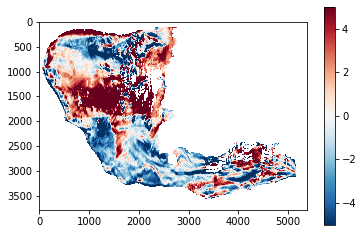

In [ ]:
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

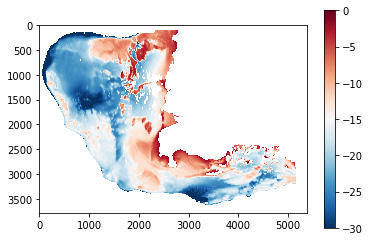

In [ ]:
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-30, vmax = 0, vcenter=-15)
pc = plt.imshow(reference, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

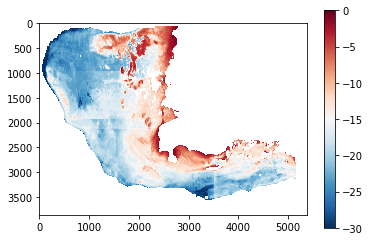

In [ ]:
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-30, vmax = 0, vcenter=-15)
pc = plt.imshow(y_pred_1_2_3_4, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_predictions.npy', y_pred_1_2_3_4)
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_error.npy', error)
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_reference.npy', reference)
df3.to_csv('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_dataframe.csv', index=False)


## Random train/test split 75-25


In [ ]:
image_shape = np.moveaxis(image, 0, -1)
image_no_nan = image_shape[~np.isnan(image_shape).any(axis=2)]
image_df = pd.DataFrame(image_no_nan)
image_df.columns = ['Aerosols','Blue','Green','Red','Red edge 1','Red edge 2','Red edge 3','NIR','Red edge 4','Water vapor','SWIR 1','SWIR 2', 'Reference']
#image_df= image_df[image_df['Reference'] > -20] # set max ref depth
image_df

Aerosols        Blue       Green         Red  Red edge 1  Red edge 2  \
0         428.000  482.000000  361.500000   97.666664   89.250000   77.750000   
1         428.000  493.666656  361.500000   90.666664   94.666664   76.666664   
2         428.000  474.250000  349.500000   97.500000   94.666664   76.666664   
3         428.000  484.000000  346.000000   94.500000   93.000000   80.333336   
4         428.000  503.333344  362.000000  100.800003   93.000000   80.333336   
...           ...         ...         ...         ...         ...         ...   
8760010   297.000  244.000000  112.000000   58.000000   64.500000   54.500000   
8760011   295.625  241.000000  114.500000   61.750000   63.000000   50.000000   
8760012   294.250  241.500000  122.199997   56.000000   53.000000   42.000000   
8760013   293.000  241.000000  102.000000   50.000000   62.000000   52.500000   
8760014   293.500  250.333328  102.666664   54.250000   58.000000   56.000000   

         Red edge 3        NIR  Red edge 4  Water vapor     SWIR 1     SWIR 2  \
0              89.0  73.750000       76.50    48.500000  79.000000  68.250000   
1              92.0  74.500000       82.75    48.500000  73.000000  65.199997   
2              88.0  65.666664       80.00    48.500000  73.000000  65.199997   
3              90.0  75.500000       84.25    48.500000  74.166664  69.250000   
4              90.0  75.000000       84.25    48.500000  74.166664  69.250000   
...             ...        ...         ...          ...        ...        ...   
8760010        62.0  54.000000       68.00     0.829787  81.000000  70.000000   
8760011        51.5  50.000000       44.00     1.000000  70.500000  62.500000   
8760012        51.0  62.500000       38.00     1.000000  70.500000  61.000000   
8760013        49.0  43.000000       52.00     1.000000  70.000000  60.000000   
8760014        57.0  54.000000       53.50     1.000000  66.500000  61.250000   

         Reference  
0        -8.986667  
1        -8.793333  
2        -8.912500  
3        -8.889999  
4        -8.772499  
...            ...  
8760010 -33.148125  
8760011 -33.300003  
8760012 -33.347500  
8760013 -34.259998  
8760014 -34.009998  

[8760015 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_df[['Aerosols', 'Blue', 'Green', 'Red', 'Red edge 1', 'Red edge 2',
       'Red edge 3', 'NIR', 'Red edge 4', 'Water vapor', 'SWIR 1', 'SWIR 2']], image_df['Reference'], test_size = 0.25, random_state = 42)


In [ ]:
model.fit(X_train,y_train)
y_pred_random = model.predict(X_test)
y_pred_random.shape

(2190004,)

In [ ]:
mae = np.mean(abs(y_pred_random - y_test))
rmse = mean_squared_error(y_test, y_pred_random, squared=False)
r2 = metrics.r2_score(y_test, y_pred_random) #Rsquared
# Print out the mean absolute error (mae)
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

MAE: 1.5748721
RMSE 2.226725
R2: 0.9113364861322939


In [ ]:
## Random split max 20m
image_shape = np.moveaxis(image, 0, -1)
image_no_nan = image_shape[~np.isnan(image_shape).any(axis=2)]
image_df = pd.DataFrame(image_no_nan)
image_df.columns = ['Aerosols','Blue','Green','Red','Red edge 1','Red edge 2','Red edge 3','NIR','Red edge 4','Water vapor','SWIR 1','SWIR 2', 'Reference']
image_df = image_df[image_df['Reference'] > -20] # set max ref depth

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_df[['Aerosols', 'Blue', 'Green', 'Red', 'Red edge 1', 'Red edge 2',
       'Red edge 3', 'NIR', 'Red edge 4', 'Water vapor', 'SWIR 1', 'SWIR 2']], image_df['Reference'], test_size = 0.25, random_state = 42)


In [ ]:
model.fit(X_train,y_train)
y_pred_random = model.predict(X_test)
y_pred_random.shape

(1445181,)

In [ ]:
mae = np.mean(abs(y_pred_random - y_test))
rmse = mean_squared_error(y_test, y_pred_random, squared=False)
r2 = metrics.r2_score(y_test, y_pred_random) #Rsquared
# Print out the mean absolute error (mae)
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

MAE: 1.0376078
RMSE 1.4547461
R2: 0.9184592196011787


In [ ]:
df_pred = pd.DataFrame(y_pred_random)
df_test = pd.DataFrame(y_test)
df_test.reset_index()
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
#df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3

Reference  Predicted      Error
0       -8.986667 -19.277184 -10.290517
1       -8.889999 -17.488960  -8.598961
2       -8.665000 -16.035240  -7.370240
3       -8.687500 -15.059444  -6.371944
4       -8.620001 -19.191614 -10.571613
...           ...        ...        ...
227812  -7.574750 -12.396008  -4.821259
227813 -13.469250 -10.990752   2.478498
227814 -15.188973 -12.697020   2.491954
227815 -15.699167 -18.243105  -2.543938
227816 -15.529183 -19.065247  -3.536063

[227817 rows x 3 columns]

MAE: 1.0376078
RMSE 1.4547461
R2: 0.9184592196011787


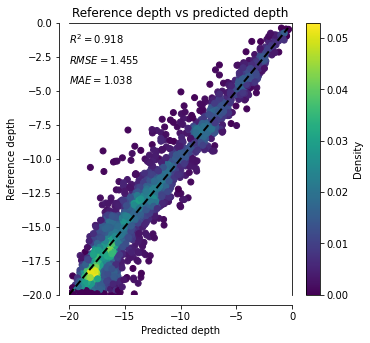

In [ ]:
df_pred = pd.DataFrame(y_pred_random)
df_test = pd.DataFrame(y_test)
df_pred.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df = pd.concat([df_test, df_pred], axis =1)
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Predicted']
#df2= df2[df2['Reference'] > -20] # set max ref depth
#df2 = df2.dropna() # Remove NaN values
df3 = df2.reset_index(drop=True)
df3['Error'] = df3['Predicted'] - df3['Reference']
df3
# Metrics
rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Predicted)
mae = np.mean(abs(df3.Reference - df3.Predicted))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-20,0])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -3))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -4.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])

## XGBoost max 20m

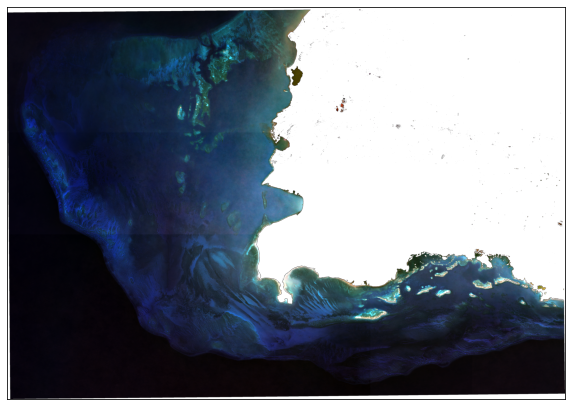

In [ ]:
## Get reference data and set all values to 1.
# Sentinel-2 image:
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance_v2.tif') as src:
    image = src.read()

image = image.astype(np.float32) # from integer to float

image[image==0] = np.nan
image[image<-1000] = np.nan
image.shape

ep.plot_rgb(image,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
def set_nan_below_threshold(image, threshold):
    mask = image[-1,:,:] < threshold
    image[:,mask] = np.nan
    return image




In [ ]:
def remove_nan(image):
    image = image.astype(np.float32) # from integer to float
    nan_mask = np.any(np.isnan(image), axis=0)
    image[:, nan_mask] = np.nan

    return image


In [ ]:
image = remove_nan(image)

In [ ]:
image = set_nan_below_threshold(image, -20)

In [ ]:
image_t = np.transpose(image, (2, 0, 1))


(965, 5389, 13)
(13, 965, 5389)
(1190601, 13)


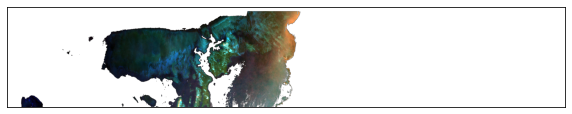

In [ ]:
image_1 = image[:,70:1035,:]
image_1_shape = np.moveaxis(image_1, 0, -1)
print(image_1_shape.shape)
image_1_no_nan = image_1_shape[~np.isnan(image_1_shape).any(axis=2)]
print(image_1.shape)
print(image_1_no_nan.shape)
ep.plot_rgb(image_1,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 965, 5389)
(1032917, 13)


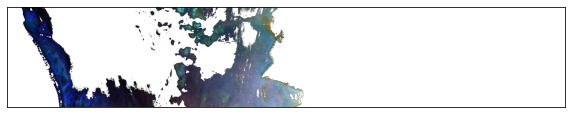

In [ ]:
image_2 = image[:,1035:2000,:]
image_2_shape = np.moveaxis(image_2, 0, -1)
image_2_no_nan = image_2_shape[~np.isnan(image_2_shape).any(axis=2)]
print(image_2.shape)
print(image_2_no_nan.shape)
ep.plot_rgb(image_2,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2800)
(1907397, 13)


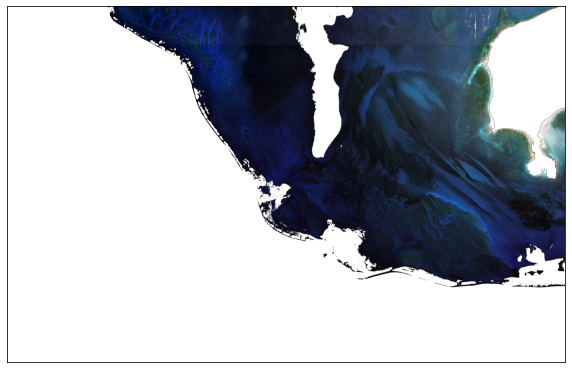

In [ ]:
image_3 = image[:,2000:,:2800]
image_3_shape = np.moveaxis(image_3, 0, -1)
image_3_no_nan = image_3_shape[~np.isnan(image_3_shape).any(axis=2)]
print(image_3.shape)
print(image_3_no_nan.shape)
ep.plot_rgb(image_3,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2589)
(1558219, 13)


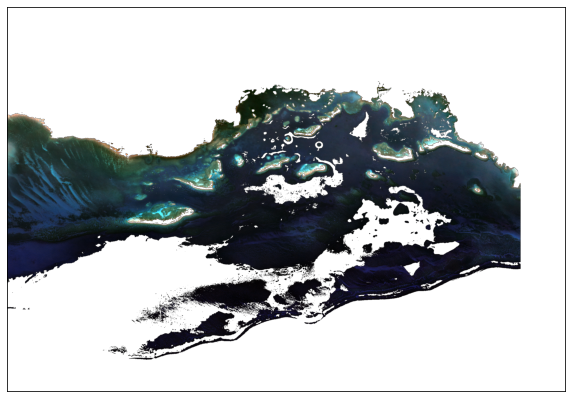

In [ ]:
image_4 = image[:,2000:,2800:]
image_4_shape = np.moveaxis(image_4, 0, -1)
image_4_no_nan = image_4_shape[~np.isnan(image_4_shape).any(axis=2)]
print(image_4.shape)
print(image_4_no_nan.shape)
ep.plot_rgb(image_4,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
# splits:
image_1_2_3_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(image_1_2_3_no_nan.shape)
image_1_2_4_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(image_1_2_4_no_nan.shape)
image_1_3_4_no_nan = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_1_3_4_no_nan.shape)
image_2_3_4_no_nan = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_2_3_4_no_nan.shape)

(4130915, 12)
(3781737, 12)
(4656217, 12)
(4498533, 12)


In [ ]:
# train splits X:
X_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(X_train_1_2_3.shape)
X_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_2_4.shape)
X_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_3_4.shape)
X_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_2_3_4.shape)

# train splits y:
y_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,-1]
print(y_train_1_2_3.shape)
y_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_2_4.shape)
y_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_3_4.shape)
y_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_2_3_4.shape)

(4130915, 12)
(3781737, 12)
(4656217, 12)
(4498533, 12)
(4130915,)
(3781737,)
(4656217,)
(4498533,)


In [ ]:
# Test splits X:
X_test_1 = image_1_no_nan[:,0:12]
print(X_test_1.shape)
X_test_2 = image_2_no_nan[:,0:12]
print(X_test_2.shape)
X_test_3 = image_3_no_nan[:,0:12]
print(X_test_3.shape)
X_test_4 = image_4_no_nan[:,0:12]
print(X_test_4.shape)

# Test splits y:
y_test_1 = image_1_no_nan[:,-1]
print(y_test_1.shape)
y_test_2 = image_2_no_nan[:,-1]
print(y_test_2.shape)
y_test_3 = image_3_no_nan[:,-1]
print(y_test_3.shape)
y_test_4 = image_4_no_nan[:,-1]
print(y_test_4.shape)

(1190601, 12)
(1032917, 12)
(1907397, 12)
(1558219, 12)
(1190601,)
(1032917,)
(1907397,)
(1558219,)


In [ ]:
model = xgb.XGBRegressor(
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 reg_lambda=0.1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 learning_rate =0.01,
 tree_method='gpu_hist',
 gpu_id=0,
 seed=27)

In [ ]:
# Train: 1,2,3. Test: 4
model.fit(X_train_1_2_3, y_train_1_2_3)
y_pred_4 = model.predict(X_test_4)

# Train: 1,2,4. Test: 3
model.fit(X_train_1_2_4, y_train_1_2_4)
y_pred_3 = model.predict(X_test_3)

# Train: 1,3,4. Test: 2
model.fit(X_train_1_3_4, y_train_1_3_4)
y_pred_2 = model.predict(X_test_2)

# Train: 2,3,4. Test: 1
model.fit(X_train_2_3_4, y_train_2_3_4)
y_pred_1 = model.predict(X_test_1)

KeyboardInterrupt: ignored

In [ ]:
def calculate_metrics_area(y_pred, y_test):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    y = y_pred[~np.isnan(y_pred)]
    df_y_pred = pd.DataFrame(y)
    y_test = y_test.flatten()
    y_test = y_test[~np.isnan(y_test)]
    df_y_test = pd.DataFrame(y_test)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_y_test, df_y_pred], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    return rmse, r2, mae

In [ ]:
rmse,r2,mae = calculate_metrics_area(y_pred_1, y_test_1)
metrics_1 = list((rmse, r2, mae))
print(metrics_1,'area 1')

rmse,r2,mae = calculate_metrics_area(y_pred_2, y_test_2)
metrics_2 = list((rmse, r2, mae))
print(metrics_2, 'area 2')

rmse,r2,mae = calculate_metrics_area(y_pred_3, y_test_3)
metrics_3 = list((rmse, r2, mae))
print(metrics_3, 'area 3')

rmse,r2,mae = calculate_metrics_area(y_pred_4, y_test_4)
metrics_4 = list((rmse, r2, mae))
print(metrics_4, 'area 4')

In [ ]:
y_pred_1_reshape = reshape_y_pred(image_1,y_pred_1)
print(y_pred_1_reshape.shape, 'y_pred_1')
y_pred_2_reshape = reshape_y_pred(image_2,y_pred_2)
print(y_pred_2_reshape.shape, 'y_pred_2')
y_pred_3_reshape = reshape_y_pred(image_3,y_pred_3)
print(y_pred_3_reshape.shape, 'y_pred_3')
y_pred_4_reshape = reshape_y_pred(image_4,y_pred_4)
print(y_pred_4_reshape.shape, 'y_pred_4')


In [ ]:
y_test_1_reshape = reshape_y_pred(image_1,y_test_1)
print(y_test_1_reshape.shape, 'y_pred_1')
y_test_2_reshape = reshape_y_pred(image_2,y_test_2)
print(y_test_2_reshape.shape, 'y_pred_2')
y_test_3_reshape = reshape_y_pred(image_3,y_test_3)
print(y_test_3_reshape.shape, 'y_pred_3')
y_test_4_reshape = reshape_y_pred(image_4,y_test_4)
print(y_test_4_reshape.shape, 'y_pred_4')


In [ ]:
y_test_3_4 = np.concatenate((y_test_3_reshape,y_test_4_reshape),axis=1)
y_test_1_2 = np.concatenate((y_test_1_reshape,y_test_2_reshape),axis=0)
y_test_3_4 = np.pad(y_test_3_4, [(0,49), (0,0)], 'constant', constant_values=(np.nan,))
y_test_1_2_3_4 = np.concatenate((y_test_1_2, y_test_3_4), axis = 0)
pc = plt.imshow(y_test_1_2_3_4)
plt.colorbar(pc)

In [ ]:
y_pred_3_4 = np.concatenate((y_pred_3_reshape,y_pred_4_reshape),axis=1)
y_pred_1_2 = np.concatenate((y_pred_1_reshape,y_pred_2_reshape),axis=0)
y_pred_3_4 = np.pad(y_pred_3_4, [(0,49), (0,0)], 'constant', constant_values=(np.nan,))
y_pred_1_2_3_4 = np.concatenate((y_pred_1_2, y_pred_3_4), axis = 0)
pc = plt.imshow(y_pred_1_2_3_4)
plt.colorbar(pc)

In [ ]:
y_test_1_2_3_4.shape

(3762, 5389)

In [ ]:
y_pred_1_2_3_4.shape

(3762, 5389)

In [ ]:
def calculate_metrics(y_pred_1_2_3, image):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    # flatten the array and remove NaN values
    a = image[12,:,:]
    y = y_pred_1_2_3.flatten()
    y = y[~np.isnan(y)]
    df_y = pd.DataFrame(y)
    r = a.flatten()
    r = r[~np.isnan(r)]
    df_r = pd.DataFrame(r)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_r, df_y], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    a_reshape= a[:,0:5389] # make a and y_pred_1_2_3 same shape to compute error
    y_pred_1_2_3_reshape = y_pred_1_2_3[0:3783,:]
    error3 = y_pred_1_2_3_reshape-a_reshape
    return df, rmse, r2, mae, error3

In [ ]:
def calculate_metrics_area(y_pred, y_test):
    """
    This function takes in two inputs, y_pred_1_2_3 and a, and outputs the rmse, r2 and mae.
    """
    y = y_pred[~np.isnan(y_pred)]
    df_y_pred = pd.DataFrame(y)
    y_test = y_test.flatten()
    y_test = y_test[~np.isnan(y_test)]
    df_y_test = pd.DataFrame(y_test)
    # concatenate the two dataframes and remove NaN values
    df = pd.concat([df_y_test, df_y_pred], axis=1)
    df = df.dropna()
    df.columns = ['Reference','Predicted']
    df = df.reset_index(drop=True)
    df['Error'] = df['Predicted'] - df['Reference']
    # calculate metrics
    rmse = mean_squared_error(df.Reference, df.Predicted, squared=False)
    r2 = r2_score(df.Reference, df.Predicted)
    mae = np.mean(abs(df.Reference - df.Predicted))
    return rmse, r2, mae

In [ ]:
rmse, r2, mae = calculate_metrics_area(y_pred_1_2_3_4, y_test_1_2_3_4)
metrics_total = list((rmse, r2, mae))
metrics_total

[2.334539, 0.7849063569663421, 1.7590412]

In [ ]:
# Result: XGBoost 10m resolution vs 30m for Sentinel-2
print('RMSE: ',(2.108-2.4759371)/2.4759371)
print('MAE: ',(1.640-1.8557541)/1.8557541)

RMSE:  -0.14860518871824321
MAE:  -0.11626222461262517


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_predictions_20m_avg.npy', y_pred_1_2_3_4)
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_reference_20m_avg.npy', y_test_1_2_3_4)
df3.to_csv('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_dataframe_20m_avg.csv', index=False)

## XGBoost max 20m. 30m resolution resampled to 10 m.

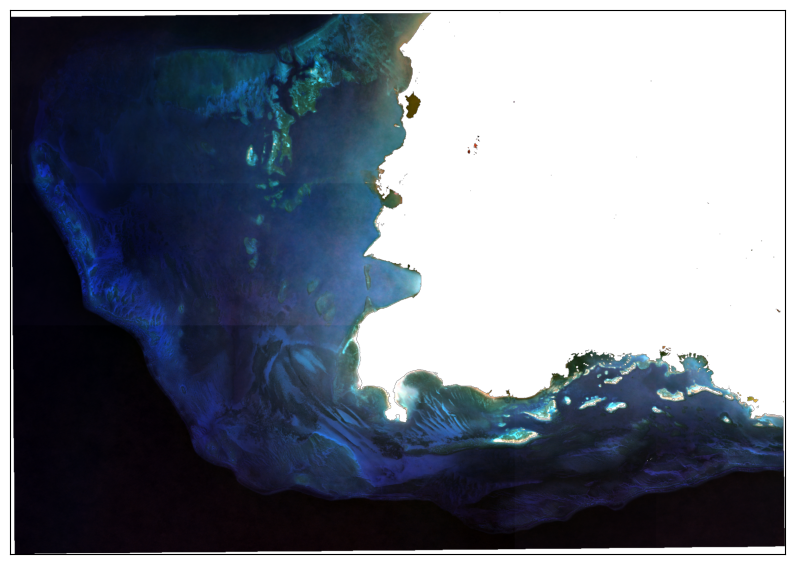

In [ ]:
## Get reference data and set all values to 1.
# Sentinel-2 image:
with rasterio.open('/content/drive/MyDrive/GEE_composites/S2_median_30m_10m_resampled.tif') as src:
    image = src.read()

image = image.astype(np.float32) # from integer to float

image[image==0] = np.nan
image[image<-1000] = np.nan
image.shape

ep.plot_rgb(image,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
def set_nan_below_threshold(image, threshold):
    mask = image[-1,:,:] < threshold
    image[:,mask] = np.nan
    return image




In [ ]:
def remove_nan(image):
    image = image.astype(np.float32) # from integer to float
    nan_mask = np.any(np.isnan(image), axis=0)
    image[:, nan_mask] = np.nan

    return image


In [ ]:
image.shape

(13, 3783, 5389)

In [ ]:
image = remove_nan(image)

In [ ]:
image = set_nan_below_threshold(image, -20)

In [ ]:
image.shape

(13, 3783, 5389)

In [ ]:
image_t = np.transpose(image, (2, 0, 1))


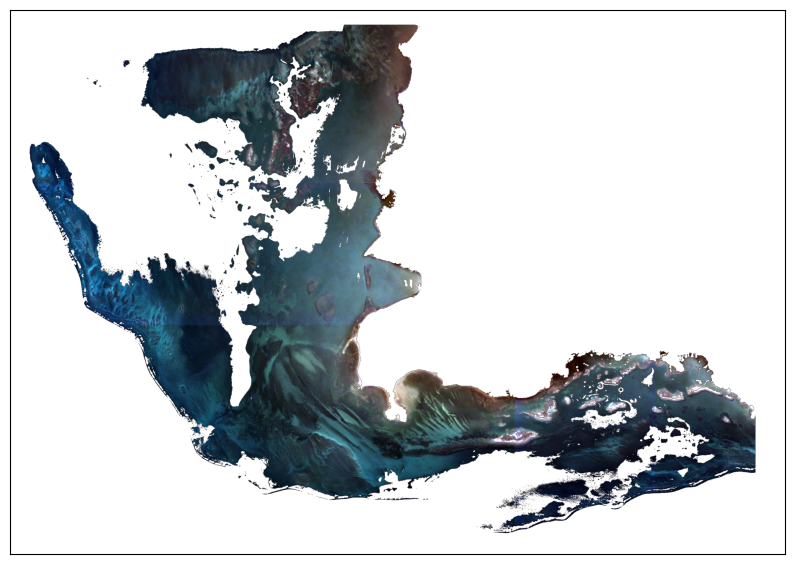

In [ ]:
ep.plot_rgb(image,
            rgb=(2, 1, 0),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
image.shape

(13, 3783, 5389)

(965, 5389, 13)
(13, 965, 5389)
(1212121, 13)


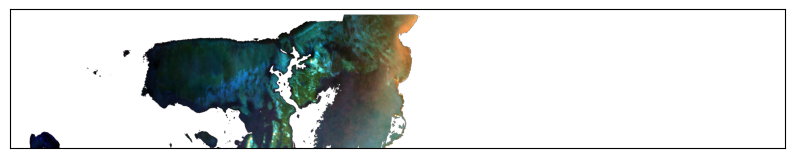

In [ ]:
image_1 = image[:,70:1035,:]
image_1_shape = np.moveaxis(image_1, 0, -1)
print(image_1_shape.shape)
image_1_no_nan = image_1_shape[~np.isnan(image_1_shape).any(axis=2)]
print(image_1.shape)
print(image_1_no_nan.shape)
ep.plot_rgb(image_1,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 965, 5389)
(1076495, 13)


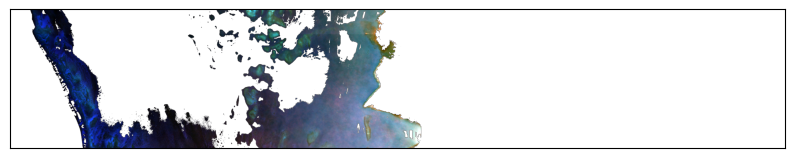

In [ ]:
image_2 = image[:,1035:2000,:]
image_2_shape = np.moveaxis(image_2, 0, -1)
image_2_no_nan = image_2_shape[~np.isnan(image_2_shape).any(axis=2)]
print(image_2.shape)
print(image_2_no_nan.shape)
ep.plot_rgb(image_2,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2800)
(1907595, 13)


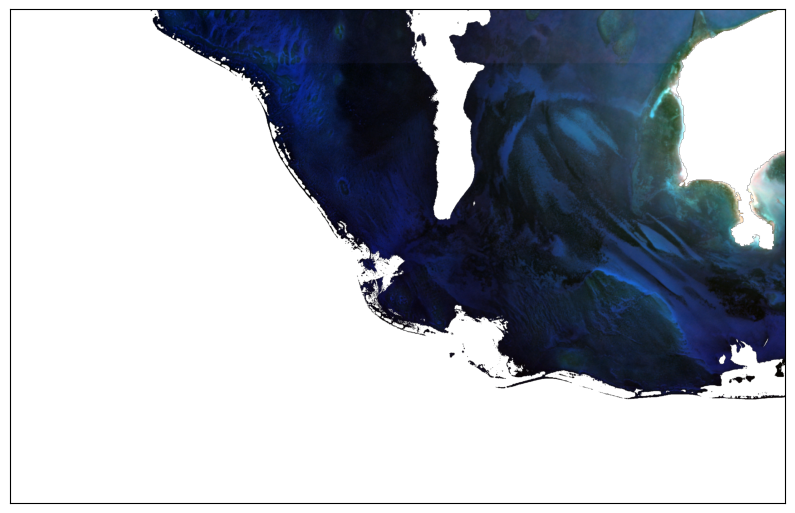

In [ ]:
image_3 = image[:,2000:,:2800]
image_3_shape = np.moveaxis(image_3, 0, -1)
image_3_no_nan = image_3_shape[~np.isnan(image_3_shape).any(axis=2)]
print(image_3.shape)
print(image_3_no_nan.shape)
ep.plot_rgb(image_3,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

(13, 1783, 2589)
(1559373, 13)


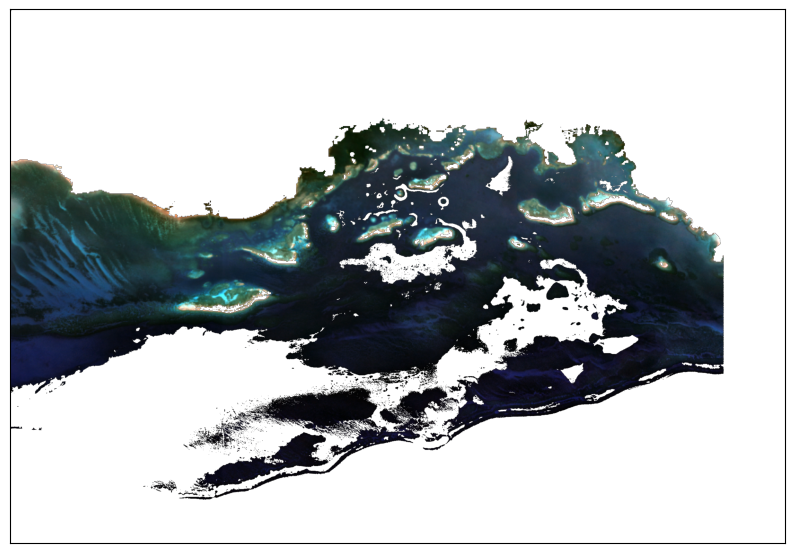

In [ ]:
image_4 = image[:,2000:,2800:]
image_4_shape = np.moveaxis(image_4, 0, -1)
image_4_no_nan = image_4_shape[~np.isnan(image_4_shape).any(axis=2)]
print(image_4.shape)
print(image_4_no_nan.shape)
ep.plot_rgb(image_4,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

In [ ]:
# splits:
image_1_2_3_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(image_1_2_3_no_nan.shape)
image_1_2_4_no_nan = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(image_1_2_4_no_nan.shape)
image_1_3_4_no_nan = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_1_3_4_no_nan.shape)
image_2_3_4_no_nan = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(image_2_3_4_no_nan.shape)

(4196211, 12)
(3847989, 12)
(4679089, 12)
(4543463, 12)


In [ ]:
# train splits X:
X_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,0:12]
print(X_train_1_2_3.shape)
X_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_2_4.shape)
X_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_1_3_4.shape)
X_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,0:12]
print(X_train_2_3_4.shape)

# train splits y:
y_train_1_2_3 = np.vstack((image_1_no_nan,image_2_no_nan,image_3_no_nan))[:,-1]
print(y_train_1_2_3.shape)
y_train_1_2_4 = np.vstack((image_1_no_nan,image_2_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_2_4.shape)
y_train_1_3_4 = np.vstack((image_1_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_1_3_4.shape)
y_train_2_3_4 = np.vstack((image_2_no_nan,image_3_no_nan,image_4_no_nan))[:,-1]
print(y_train_2_3_4.shape)

(4196211, 12)
(3847989, 12)
(4679089, 12)
(4543463, 12)
(4196211,)
(3847989,)
(4679089,)
(4543463,)


In [ ]:
# Test splits X:
X_test_1 = image_1_no_nan[:,0:12]
print(X_test_1.shape)
X_test_2 = image_2_no_nan[:,0:12]
print(X_test_2.shape)
X_test_3 = image_3_no_nan[:,0:12]
print(X_test_3.shape)
X_test_4 = image_4_no_nan[:,0:12]
print(X_test_4.shape)

# Test splits y:
y_test_1 = image_1_no_nan[:,-1]
print(y_test_1.shape)
y_test_2 = image_2_no_nan[:,-1]
print(y_test_2.shape)
y_test_3 = image_3_no_nan[:,-1]
print(y_test_3.shape)
y_test_4 = image_4_no_nan[:,-1]
print(y_test_4.shape)

(1212121, 12)
(1076495, 12)
(1907595, 12)
(1559373, 12)
(1212121,)
(1076495,)
(1907595,)
(1559373,)


In [ ]:
model = xgb.XGBRegressor(
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 reg_lambda=0.1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 learning_rate =0.01,
 tree_method='gpu_hist',
 gpu_id=0,
 seed=27)

In [ ]:
# Train: 1,2,3. Test: 4
model.fit(X_train_1_2_3, y_train_1_2_3)
y_pred_4 = model.predict(X_test_4)

# Train: 1,2,4. Test: 3
model.fit(X_train_1_2_4, y_train_1_2_4)
y_pred_3 = model.predict(X_test_3)

# Train: 1,3,4. Test: 2
model.fit(X_train_1_3_4, y_train_1_3_4)
y_pred_2 = model.predict(X_test_2)

# Train: 2,3,4. Test: 1
model.fit(X_train_2_3_4, y_train_2_3_4)
y_pred_1 = model.predict(X_test_1)

In [ ]:
print(y_pred_1.shape, 'y_pred_1')
print(y_test_1.shape, 'y_test_1')
print(y_pred_2.shape, 'y_pred_2')
print(y_test_2.shape, 'y_test_2')
print(y_pred_3.shape, 'y_pred_3')
print(y_test_3.shape, 'y_test_3')
print(y_pred_4.shape, 'y_pred_4')
print(y_test_4.shape, 'y_test_4')

(1212121,) y_pred_1
(1212121,) y_test_1
(1076495,) y_pred_2
(1076495,) y_test_2
(1907595,) y_pred_3
(1907595,) y_test_3
(1559373,) y_pred_4
(1559373,) y_test_4


In [ ]:
rmse,r2,mae = calculate_metrics_area(y_pred_1, y_test_1)
metrics_1 = list((rmse, r2, mae))
print(metrics_1,'area 1')

rmse,r2,mae = calculate_metrics_area(y_pred_2, y_test_2)
metrics_2 = list((rmse, r2, mae))
print(metrics_2, 'area 2')

rmse,r2,mae = calculate_metrics_area(y_pred_3, y_test_3)
metrics_3 = list((rmse, r2, mae))
print(metrics_3, 'area 3')

rmse,r2,mae = calculate_metrics_area(y_pred_4, y_test_4)
metrics_4 = list((rmse, r2, mae))
print(metrics_4, 'area 4')

[2.235627, 0.7836224454566061, 1.714081] area 1
[2.9351058, 0.6443554763931274, 2.2011414] area 2
[1.8822638, 0.7970695865161297, 1.4863611] area 3
[2.3976333, 0.816963367639645, 1.7654591] area 4


In [ ]:
y_pred_1_reshape = reshape_y_pred(image_1,y_pred_1)
print(y_pred_1_reshape.shape, 'y_pred_1')
y_pred_2_reshape = reshape_y_pred(image_2,y_pred_2)
print(y_pred_2_reshape.shape, 'y_pred_2')
y_pred_3_reshape = reshape_y_pred(image_3,y_pred_3)
print(y_pred_3_reshape.shape, 'y_pred_3')
y_pred_4_reshape = reshape_y_pred(image_4,y_pred_4)
print(y_pred_4_reshape.shape, 'y_pred_4')


(965, 5389) y_pred_1
(965, 5389) y_pred_2
(1783, 2800) y_pred_3
(1783, 2589) y_pred_4


In [ ]:
y_test_1_reshape = reshape_y_pred(image_1,y_test_1)
print(y_test_1_reshape.shape, 'y_pred_1')
y_test_2_reshape = reshape_y_pred(image_2,y_test_2)
print(y_test_2_reshape.shape, 'y_pred_2')
y_test_3_reshape = reshape_y_pred(image_3,y_test_3)
print(y_test_3_reshape.shape, 'y_pred_3')
y_test_4_reshape = reshape_y_pred(image_4,y_test_4)
print(y_test_4_reshape.shape, 'y_pred_4')


(965, 5389) y_pred_1
(965, 5389) y_pred_2
(1783, 2800) y_pred_3
(1783, 2589) y_pred_4


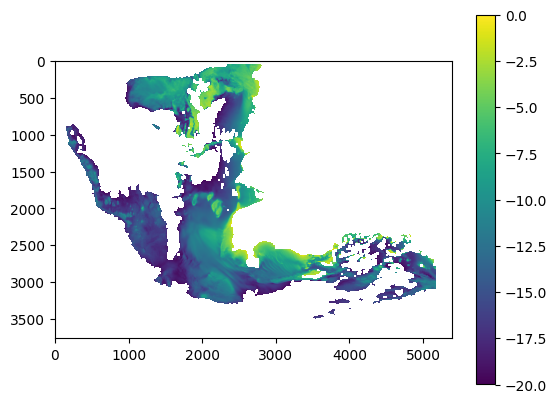

In [ ]:
y_test_3_4 = np.concatenate((y_test_3_reshape,y_test_4_reshape),axis=1)
y_test_1_2 = np.concatenate((y_test_1_reshape,y_test_2_reshape),axis=0)
y_test_3_4 = np.pad(y_test_3_4, [(0,49), (0,0)], 'constant', constant_values=(np.nan,))
y_test_1_2_3_4 = np.concatenate((y_test_1_2, y_test_3_4), axis = 0)
pc = plt.imshow(y_test_1_2_3_4)
plt.colorbar(pc)

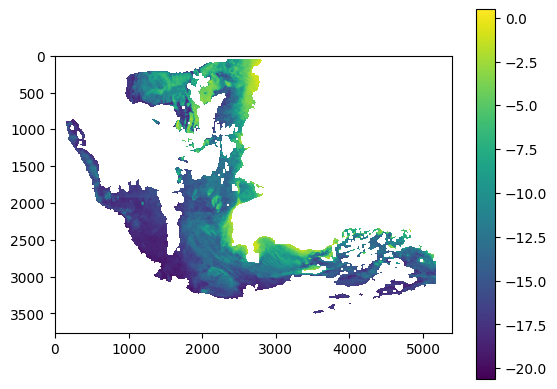

In [ ]:
y_pred_3_4 = np.concatenate((y_pred_3_reshape,y_pred_4_reshape),axis=1)
y_pred_1_2 = np.concatenate((y_pred_1_reshape,y_pred_2_reshape),axis=0)
y_pred_3_4 = np.pad(y_pred_3_4, [(0,49), (0,0)], 'constant', constant_values=(np.nan,))
y_pred_1_2_3_4 = np.concatenate((y_pred_1_2, y_pred_3_4), axis = 0)
pc = plt.imshow(y_pred_1_2_3_4)
plt.colorbar(pc)

In [ ]:
rmse, r2, mae = calculate_metrics_area(y_pred_1_2_3_4, y_test_1_2_3_4)
metrics_total = list((rmse, r2, mae))
metrics_total

[2.3228421, 0.7876994124017024, 1.7436249]

In [ ]:
# Result: XGBoost 10m resolution vs 30m for Sentinel-2
print('RMSE: ',(2.108-2.4759371)/2.4759371)
print('MAE: ',(1.640-1.8557541)/1.8557541)

RMSE:  -0.14860518871824321
MAE:  -0.11626222461262517


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_predictions_30_10.npy', y_pred_1_2_3_4)
np.save('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_reference_30_10.npy', y_test_1_2_3_4)
df3.to_csv('/content/drive/My Drive/Predictions_final/3_XGBoost_S2_dataframe_30_10.csv', index=False)

NameError: ignored